# Oxfam Intermon

In [1]:
#Impotando Numpy:
import numpy as np
#Importando Pandas:
import pandas as pd
#Importando para realizar gráficos:
import matplotlib.pyplot as plt

## Descargando el primer archivo: 

Para ahorrar tiempo, si existe columnas de fechas, es recomendable usar la opción **`parse_dates`** para definir rápidamente el datatime.  


In [2]:
account= pd.read_csv('~/Documents/Analisis de Datos/Oxfam/account_id_data.csv', 
                     parse_dates=['date_of_birth','original_recruitment_date'])

In [3]:
account.dtypes#Averiguando las primeras características de las variables:

account_id                            int64
date_of_birth                datetime64[ns]
original_recruitment_date    datetime64[ns]
recruitment_channel                  object
gender                               object
dtype: object

In [4]:
account.head()

,account_id,date_of_birth,original_recruitment_date,recruitment_channel,gender
0,3000336,1955-07-08,2006-05-12,apartado_correos,mujer
1,3000549,1967-02-11,1999-05-20,apartado_correos,hombre
2,3000610,1975-06-08,2007-04-13,web,mujer
3,3003613,1966-03-05,1984-01-01,apartado_correos,mujer
4,3004202,1978-03-01,1999-05-20,web,hombre


Quiero saber si existen valores nulos:

In [5]:
account.isnull().any()

account_id                   False
date_of_birth                 True
original_recruitment_date     True
recruitment_channel          False
gender                       False
dtype: bool

Solo existen valores nulos en las columnas: **`date_of_birth`** y **`original_recruitment_date`**

## Descargando el segundo archivo: 

In [6]:
gifts= pd.read_csv('~/Documents/Analisis de Datos/Oxfam/gifts.csv',parse_dates=['payment_date'])

In [7]:
gifts.dtypes

gift_id                    int64
account_id                 int64
payment_date      datetime64[ns]
payment_amount           float64
gift_type                 object
frequency                 object
dtype: object

In [8]:
gifts.head()

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency
0,27132848,3481181,2016-01-01,6.0,Cuotas,Mensual
1,27133296,3356658,2016-01-01,12.0,Cuotas,Mensual
2,27133300,3749018,2016-01-01,12.0,Cuotas,Mensual
3,27133306,3594961,2016-01-01,50.0,Cuotas,Mensual
4,27133519,3545518,2016-01-01,20.0,Cuotas,Mensual


*Un apunte de como usar la opción format en datatime.*

```Python
gifts['payment_date']= pd.to_datetime(gifts['payment_date'],format='%Y-%m-%d') 
```

1. **¿En qué mes de 2016 se realizaron más donativos puntuales?¿Y cuál fue el importe medio de estos donativos en ese mes?**

In [9]:
#Agregando la columna "año" a la tabla gifts:
gifts["año"] = gifts['payment_date'].dt.year#Recordar que se debe de añadir "dt" respecto a la unidad de tiempo
#Agregando la columna "mes" a la tabla gifts:
gifts["mes"] = gifts['payment_date'].dt.month

In [10]:
#Cerciorando que la tabla esta configurada como esperamos:
gifts.head()

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency,año,mes
0,27132848,3481181,2016-01-01,6.0,Cuotas,Mensual,2016,1
1,27133296,3356658,2016-01-01,12.0,Cuotas,Mensual,2016,1
2,27133300,3749018,2016-01-01,12.0,Cuotas,Mensual,2016,1
3,27133306,3594961,2016-01-01,50.0,Cuotas,Mensual,2016,1
4,27133519,3545518,2016-01-01,20.0,Cuotas,Mensual,2016,1


Ahora quiero saber si solo regrista la columna `"año"` a 2016:

In [11]:
gifts['año'].all()

True

Quiere decir que todos los datos registrados en la tabla **`gifts` corresponden al año 2016**

Quiero saber si existen valores nulos:

In [12]:
gifts.isnull().any()

gift_id           False
account_id        False
payment_date      False
payment_amount    False
gift_type         False
frequency          True
año               False
mes               False
dtype: bool

Solo existen valores nulos en la columna `frequency`. Por tanto, ello no interfiere en la pregunta

In [13]:
#Haciendo un group by:
agrup_maxdon =gifts.groupby('mes',as_index=False).agg({'account_id':'count','payment_amount':'mean'})
agrup_maxdon

,mes,account_id,payment_amount
0,1,8188,18.983955
1,2,8126,18.102645
2,3,8276,17.325123
3,4,9114,16.184320
4,5,8691,17.510305
5,6,8643,18.456946
6,7,8696,17.650336
7,8,8543,17.207552
8,9,8568,17.504718
9,10,8611,17.731632


In [14]:
#Seleccionado el mes con mayores donaciones y la donación media:
agrup_maxdon[agrup_maxdon['account_id']== max(agrup_maxdon['account_id'])]

,mes,account_id,payment_amount
3,4,9114,16.18432


2. **¿Cuál es la antigüedad de los colaboradores en el 3r cuartil (75%muestra)?<br>¿Es mayor para los hombres o para las mujeres?(No tener en cuenta *NA*, calcular antigüedad desde *“2016-12-31”*)**

In [15]:
account['date_of_birth'].astype('int64').quantile([.75]).astype('datetime64[ns]')

0.75   1973-11-07 18:00:00
Name: date_of_birth, dtype: datetime64[ns]

In [16]:
#Seleccionando los donantes mayores al cuartil 0.75:
personas_mayores = account[account['date_of_birth']< pd.to_datetime('1973-11-07',format='%Y-%m-%d')]
#Chequeándolos:
personas_mayores.tail()

,account_id,date_of_birth,original_recruitment_date,recruitment_channel,gender
9659,4753624,1964-09-21,2016-11-10,cara_a_cara,indeterminado
9661,4756897,1954-04-24,2016-11-15,cara_a_cara,indeterminado
9662,4759670,1961-07-23,2016-11-17,cara_a_cara,indeterminado
9670,4780314,1960-07-09,2016-12-14,puerta_a_puerta,indeterminado
9671,4888369,1972-12-16,2016-06-06,otros,indeterminado


In [17]:
#Haciendo un groupby por generos:
agrup_genero = personas_mayores.groupby('gender',as_index=False).agg({'account_id':'count'})
agrup_genero

,gender,account_id
0,hombre,2688
1,indeterminado,70
2,mujer,3221


In [18]:
agrup_genero[agrup_genero['account_id']== max(agrup_genero['account_id'])]

,gender,account_id
2,mujer,3221


3. **Haz un gráfico que muestre el importe total de donativos “Cuotas” por mes y por “recruitment channel”<br>¿En qué mes los captados por teléfono tienen un importe de cuotas mayor?**

In [19]:
#Seleccionando los tipos de regalos que son `Cuotas`:
gifts_cuotas = gifts[gifts['gift_type'] == 'Cuotas']

In [20]:
#Haciendo un inner join:
gifts_cuotas_union= gifts_cuotas.merge(account,how='inner',on= 'account_id')
gifts_cuotas_union.head()

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency,año,mes,date_of_birth,original_recruitment_date,recruitment_channel,gender
0,27132848,3481181,2016-01-01,6.0,Cuotas,Mensual,2016,1,NaT,2004-01-19,web,hombre
1,27264848,3481181,2016-02-01,6.0,Cuotas,Mensual,2016,2,NaT,2004-01-19,web,hombre
2,27401390,3481181,2016-03-01,6.0,Cuotas,Mensual,2016,3,NaT,2004-01-19,web,hombre
3,27543013,3481181,2016-04-01,6.0,Cuotas,Mensual,2016,4,NaT,2004-01-19,web,hombre
4,27683535,3481181,2016-05-01,6.0,Cuotas,Mensual,2016,5,NaT,2004-01-19,web,hombre


In [21]:
#Haciendo un grup_by por 'recruitment_channel' y 'mes':
gifts_cuotas_union_groupby = gifts_cuotas_union.groupby(['recruitment_channel','mes']).agg({'payment_amount':'sum'}).unstack()
gifts_cuotas_union_groupby.head()

payment_amount                                          \
mes                             1         2         3         4         5    
recruitment_channel                                                          
apartado_correos          59585.69  55749.27  56496.36  57000.14  56089.89   
cara_a_cara               18312.61  18639.43  18885.78  19287.18  19620.56   
llamada                   20432.24  19368.24  20508.99  21614.24  20915.06   
otros                       370.16    396.95    370.53    370.53    537.54   
puerta_a_puerta           28593.02  28666.20  30156.20  30567.25  31089.27   

                                                                       \
mes                        6         7         8         9         10   
recruitment_channel                                                     
apartado_correos     57722.80  59284.05  55864.05  56483.62  57526.39   
cara_a_cara          19525.60  20374.18  20251.34  20056.34  20211.55   
llamada              22347.53  23200.80  21750.94  22713.40  23522.91   
otros                  471.12    451.12    447.54    461.12    464.12   
puerta_a_puerta      30728.05  31371.27  30980.36  31027.61  31079.15   

                                         
mes                        11        12  
recruitment_channel                      
apartado_correos     56727.80  59554.73  
cara_a_cara          20097.35  19500.71  
llamada              22096.67  24365.47  
otros                  490.54    464.12  
puerta_a_puerta      30757.49  30566.83

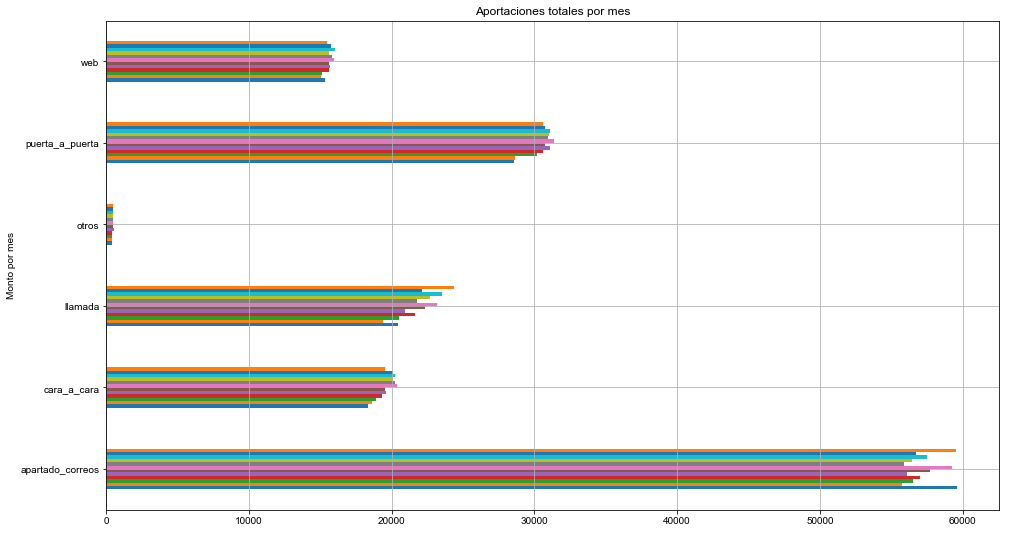

In [22]:
gifts_cuotas_union_groupby.plot.barh(title = 'Aportaciones totales por mes',figsize=(16,9),legend= False)
plt.ylabel('Monto por mes')
plt.grid(True)
plt.style.use('seaborn')
plt.show()

Se registra un mayor importe de donaciones por `llamada` en el mes de diciembre.

<style>
body {
text-align: justify}
4.Si clasificamos la Antigüedad en 4 grupos: los que tienen una antigüedad menor a 1 año “<1”, los que tienen un antigüedad igual o mayor a 1 año y menor a 3, “1_a_3”, los que tienen una antigüedad igual o mayor a 3 e inferior a 5, “3_a_5” y los que tienen una antigüedad mayor o igual a 5, “>5”. (No tener en cuenta NA’s)<br>¿Puedes decir en cuál de estos grupos de antigüedad las mujeres tienen una media de cuota anualizada mayor? ¿Cuál es esa media? (cuota anualizada es la suma de todas las gift_type == “Cuotas” pagadas por cada colaborador durante el año)<br> ¿Dentro de este grupo “ganador”, para que canal de captación (“recruitment_channel”) la cuota anualizada es más alta?¿Cuál es el importe? </style>

4. **Si clasificamos la Antigüedad en 4 grupos: los que tienen una antigüedad menor a 1 año *“<1”*, los que tienen un antigüedad igual o mayor a 1 año y menor a 3, *“1_a_3”*, los que tienen una antigüedad igual o mayor a 3 e inferior a 5, *“3_a_5”* y los que tienen una antigüedad mayor o igual a 5, *“>5”*. (No tener en cuenta NA’s):<br>¿Puedes decir en cuál de estos grupos de antigüedad las mujeres tienen una media de cuota anualizada mayor? <br>¿Cuál es esa media? (cuota anualizada es la suma de todas las `gift_type == “Cuotas”` pagadas por cada colaborador durante el año) <br>¿Dentro de este grupo “ganador”, para que canal de captación (“recruitment_channel”) la cuota anualizada es más alta?¿Cuál es el importe?**

Cogiendo los datos donde `gift_type== Cuotas`:

In [23]:
#Borrando la columna años que corresponden al año que aportaron la última vez:
del gifts_cuotas_union['año']

In [24]:
#Añadiendo la columna año, pero que corresponde al año de reclutamiento:
gifts_cuotas_union['año']= gifts_cuotas_union['original_recruitment_date'].dt.year

In [25]:
gifts_cuotas_union.dtypes

gift_id                               int64
account_id                            int64
payment_date                 datetime64[ns]
payment_amount                      float64
gift_type                            object
frequency                            object
mes                                   int64
date_of_birth                datetime64[ns]
original_recruitment_date    datetime64[ns]
recruitment_channel                  object
gender                               object
año                                 float64
dtype: object

Haciendo cuatro filtros de los que se inscribieron:
1. 2016
2. [2013, 2016]
3. [2011,2013]
4. Antes del 2011

In [26]:
#1.Los incritos durante el 2016:
inscritos_2016= gifts_cuotas_union[gifts_cuotas_union['año']==2016]

In [27]:
#2.Los inscritos entre 2013 hasta 2016:
inscritos_1316= gifts_cuotas_union[gifts_cuotas_union['año'].isin([2013,2014,2015])]

In [28]:
#3.Los inscritos entre 2011 y 2013:
inscritos_1112= gifts_cuotas_union[gifts_cuotas_union['año'].isin([2011,2012])]

In [29]:
#4.Los inscritos antes del 2011:
inscritos_viejos= gifts_cuotas_union[gifts_cuotas_union['año']<2011]

**Haciendo un filter del genero $mujer$** y luego cálcular la `suma total` de las aportantes por cada segmentación hecha:

In [30]:
#1.De los inscritos durante el 2016:
inscritos_2016[inscritos_2016['gender']== 'mujer'].groupby('account_id').agg({'payment_amount':'sum'}).mean()

payment_amount    103.927855
dtype: float64

In [31]:
#2. De los incritos entre 2013 a 2016:
inscritos_1316[inscritos_1316['gender']== 'mujer'].groupby('account_id').agg({'payment_amount':'sum'}).mean()

payment_amount    156.181767
dtype: float64

In [32]:
#3. De los inscritos entre 2011 hasta 2013:
inscritos_1112[inscritos_1112['gender']== 'mujer'].groupby('account_id').agg({'payment_amount':'sum'}).mean()

payment_amount    156.393043
dtype: float64

In [33]:
#4. De los inscritos antes del 2011:
inscritos_viejos[inscritos_viejos['gender']== 'mujer'].groupby('account_id').agg({'payment_amount':'sum'}).mean()

payment_amount    180.75837
dtype: float64

La mejor cuota viene a ser de los aportantes inscritas antes del 2011, cuyo cuota anual medio asciende a **180.76 euros**.<br> <br> <br>
Haciendo un groupby por `recruitment_channel` y luego agrupo por aportante la cantidad total y solo obtengo la media

In [34]:
groupby=inscritos_viejos[inscritos_viejos['gender']== 'mujer'].groupby(['recruitment_channel','account_id']).agg({'payment_amount':'sum'})
groupby.groupby('recruitment_channel').agg({'payment_amount':'mean'})

,payment_amount
recruitment_channel,
apartado_correos,206.163669
cara_a_cara,135.299288
llamada,146.460809
otros,167.995000
puerta_a_puerta,158.593193
web,226.785578


Por la $web$ se obtiene la cuota promedio anual más alta, cuyo valor asciende a **226.79 euros**. 

5. **Crea unos diagramas de caja (boxplot) con la cuota anualizada (ten en cuenta solo las cuotas menores de 500 eur) por canal de captación (recruitment_channel) y en función de los resultados, teniendo en cuenta que queremos maximizar la cuota anualizada de los donativos, ¿Por qué canal/es se debería apostar?**

In [35]:
#De la tabla 'gifts_cuotas_union',haciendo un groupby por 'recruitment_channel' y por 'account_id':
gifts_cuotas_union_recruitmentchannel_accountid = gifts_cuotas_union.groupby(['recruitment_channel','account_id']).agg({'payment_amount':'sum'})

In [36]:
#Haciendo un filtro de las cuotas menores a 500 euros:
gifts_cuotas_union_recruitmentchannel_accountid_menores=  gifts_cuotas_union_recruitmentchannel_accountid[gifts_cuotas_union_recruitmentchannel_accountid['payment_amount']<500 ] 

In [37]:
gifts_cuotas_union_recruitmentchannel_accountid_menores.head()

payment_amount
recruitment_channel account_id                
apartado_correos    3000336             300.00
                    3000549             165.00
                    3003613             195.15
                    3004239             300.00
                    3004241             372.00

In [38]:
#Haciendo un groupby de nuevo pero solo por 'recruitment_channel':
gifts_cuotas_union_recruitmentchannel_accountid_menores1= gifts_cuotas_union_recruitmentchannel_accountid_menores.groupby('recruitment_channel')

In [39]:
gifts_cuotas_union_recruitmentchannel_accountid_menores1.head()

payment_amount
recruitment_channel account_id                
apartado_correos    3000336             300.00
                    3000549             165.00
                    3003613             195.15
                    3004239             300.00
                    3004241             372.00
cara_a_cara         3006254             120.36
                    3006722             208.80
                    3008948             144.00
                    3009308             120.00
                    3014280              36.00
llamada             3004619              84.00
                    3005986              60.00
                    3006257             160.00
                    3007267             180.00
                    3007424              70.00
otros               3142425             155.00
                    3185343             190.32
                    3253393             216.36
                    3286952             180.00
                    3339241              72.12
puerta_a_puerta     3004937             180.00
                    3022494              60.00
                    3023389             120.00
                    3024452             360.00
                    3024859             120.00
web                 3000610             240.00
                    3004202             432.00
                    3004223             401.16
                    3004322             174.48
                    3005186             240.00

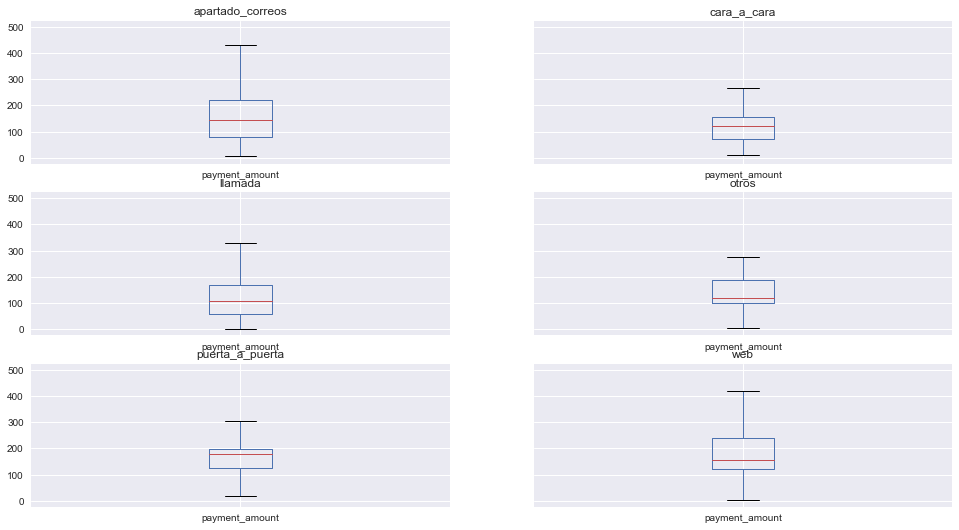

In [40]:
#Graficando los plots:
gifts_cuotas_union_recruitmentchannel_accountid_menores1.boxplot(figsize=(16,9))
plt.show()

Apostaria por `apartados_correos`, la `web` y `puerta_a_puerta`